# 1. Problem definition
#### What problem are we trying to solve?
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges us to predict **the final price of each home**.

**Goal**: It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 


# 2. Data
#### What data do we have?
Here's a brief version of what you'll find in the data description file.

There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81, of which 36 is quantitative, 43 categorical + Id and SalePrice. <br>

Quantitative: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold <br>

Qualitative: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities, <br>

# 3. Evaluation
#### What defines succes?
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Importing packages

In [1]:
import pandas as pd
import numpy as np

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

# Packages for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# XGBoost packages
from xgboost import XGBRegressor
from catboost import CatBoostRegressor




In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Import Data

In [3]:
train_df = pd.read_csv("train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Getting familiar with our data

In [4]:
train_df['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [5]:
train_df['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [6]:
train_df.shape

(1460, 81)

In [7]:
train_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
train_df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Total number of rows in our dataset

In [11]:
len(train_df)

1460

# Adding new features to our data
Most of the time the more feature you have, the better result you'll get.<br>

Let's try it!


### TotalFloorarea
In **TotalFloorarea** column we want to have the total floor area which is the sum of 1stFlrSF and 2ndFlrSF.

In [12]:
# Create TotalFloorarea column
train_df['TotalFloorarea'] = train_df['1stFlrSF'] + train_df['2ndFlrSF']

### TotalPorchSf
The total number of porch.

In [13]:
train_df['TotalPorchSf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']

### ExQualCond

First of all, we should change ExterQual and ExterCond into numeric values by hand and then find an average of them.<br>

**Note:** ExterQual: Evaluates the quality of the material on the exterior 
		
*       Ex	Excellent
*       Gd	Good
*       TA	Average/Typical
*       Fa	Fair
*       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
*       Ex	Excellent
*       Gd	Good
*       TA	Average/Typical
*       Fa	Fair
*       Po	Poor


In [14]:
train_df['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [15]:
train_df['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [16]:
# Change the object type to numeric type 
train_df['ExterQual'] = train_df['ExterQual'].replace(['Fa', 'TA', 'Gd', 'Ex'], [1, 2, 3, 4])
train_df['ExterCond'] = train_df['ExterCond'].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'], [1, 2, 3, 4, 5])
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalFloorarea,TotalPorchSf
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,3,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1710,61
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,3,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1262,298
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,3,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1786,42
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,3,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1717,307
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,3,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2198,276


In [17]:
train_df['ExQualCond'] = (train_df['ExterQual'] + train_df['ExterCond']) / 2

### BsmtQualCond

Let's do the similar things for the BsmtQual and BsmtCond columns

In [18]:
train_df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [19]:
train_df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [20]:
train_df['BsmtQual'] = train_df['BsmtQual'].replace(['Fa', 'TA', 'Gd', 'Ex'], [1, 2, 3, 4])
train_df['BsmtCond'] = train_df['BsmtCond'].replace(['Po', 'Fa', 'TA', 'Gd'], [1, 2, 3, 4])
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalFloorarea,TotalPorchSf,ExQualCond
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,3,PConc,3.0,3.0,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1710,61,3.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,3,CBlock,3.0,3.0,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1262,298,2.5
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,3,PConc,3.0,3.0,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1786,42,3.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,3,BrkTil,2.0,4.0,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1717,307,2.5
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,3,PConc,3.0,3.0,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2198,276,3.0


In [21]:
train_df['BsmtQualCond'] = (train_df['BsmtQual'] + train_df['BsmtCond']) / 2

### TotalBath & BsmtTotalBath & AbvTotalBath
Now we want to have the total number of bath in a house ( full bath basement + half bath basement + full bath above + half bath above ) <br>

Also we want total number of bath in basement and above the basement.


In [22]:
# Total number of bath in basement
train_df['BsmtTotalBath'] = train_df['BsmtFullBath'] + train_df['BsmtHalfBath']
# Total number of bath above the basement
train_df['AbvTotalBath'] = train_df['FullBath'] + train_df['HalfBath']
# Total number of baths in a house
train_df['TotalBath'] = train_df['BsmtTotalBath'] + train_df['AbvTotalBath']

### Finishedbsmt
we have a column called TotalBsmtSF which personally I don't think it can give our model a better understanding because it calculate unfinished basement on total number.<br>
Let's create a column which shows us the finished basement area.

In [23]:
train_df['Finishedbsmt'] = train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']

### QualCond
The average number of quality and condition of a house which could be really usefull.

In [24]:
train_df['QualCond'] = (train_df['OverallQual'] + train_df['OverallCond']) / 2

### Hascolumns
In this series of columns, we want to create new columns just to identify if the house has something or not...<br>
Let's see it in action!

In [25]:
# if the house has a second floor x turns into 1
train_df['Has2ndFloor'] = train_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# if the house has a garage x turns into 1
train_df['HasGarage'] = train_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0) 
# if the house has a basement x turns into 1
train_df['Hasbsmt'] = train_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# if the house has a Fireplace x turns into 1
train_df['HasFireplace'] = train_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0) 

### YrBltAndRemod
The sum of YearBuilt and YearRemodAdd, the higher the better because it shows how recently the house was build or remodel.

In [26]:
train_df['YrBltAndRemod'] = train_df['YearBuilt'] + train_df['YearRemodAdd']

## Missing values
We have 19 columns with missing data and if there are more than 1000 missing values, we should drop the column.
For other situations we find a way to fill them.

In [27]:
# It will show us the missing value in a column if True means have a missing value false means without missing value
pd.isna(train_df['FireplaceQu'])

0        True
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458     True
1459     True
Name: FireplaceQu, Length: 1460, dtype: bool

In [28]:
def find_fill_missing_numeric_under_1100(df):
    """
    It gives us numeric columns with missing values under 1100...
    Also it will automatically delete numeric columns with over 1100 missing values.
    """
    for label, content in df.items():
        # finding columns with numeric type and also have missing values
        if pd.api.types.is_numeric_dtype(content) and df[label].isna().sum() != 0:
            # check for the number of missing values
            if df[label].isna().sum() <= 1100:
                # Filling missing value with median of that column
                df[label] = df[label].fillna(df[label].median())
            else:
                df.drop(label, axis=1, inplace=True)
        
    return df.isna().sum()

In [29]:
def find_missing_over_1100(df):
    """
    Find columns other than numeric with over 1100 missing values...
    And automatically delete it
    """
    list_missing = []
    for label, content in df.items():
        # find columns with missing values over 1100 
        if df[label].isna().sum() >= 1100:
            # add to our list of missing
            list_missing.append(label)
            # removing them
            df.drop(label, axis=1, inplace=True)
            
    return list_missing, df.info()
            

In [30]:
find_fill_missing_numeric_under_1100(train_df)

Id                   0
MSSubClass           0
MSZoning             0
LotFrontage          0
LotArea              0
Street               0
Alley             1369
LotShape             0
LandContour          0
Utilities            0
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Condition2           0
BldgType             0
HouseStyle           0
OverallQual          0
OverallCond          0
YearBuilt            0
YearRemodAdd         0
RoofStyle            0
RoofMatl             0
Exterior1st          0
Exterior2nd          0
MasVnrType           8
MasVnrArea           0
ExterQual            0
ExterCond            0
Foundation           0
BsmtQual             0
BsmtCond             0
BsmtExposure        38
BsmtFinType1        37
BsmtFinSF1           0
BsmtFinType2        38
BsmtFinSF2           0
BsmtUnfSF            0
TotalBsmtSF          0
Heating              0
HeatingQC            0
CentralAir           0
Electrical           1
1stFlrSF   

In [31]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalFloorarea,TotalPorchSf,ExQualCond,BsmtQualCond,BsmtTotalBath,AbvTotalBath,TotalBath,Finishedbsmt,QualCond,Has2ndFloor,HasGarage,Hasbsmt,HasFireplace,YrBltAndRemod
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,3,PConc,3.0,3.0,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1710,61,3.0,3.0,1,3,4,706,6.0,1,1,1,0,4006
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,3,CBlock,3.0,3.0,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1262,298,2.5,3.0,1,2,3,978,7.0,0,1,1,1,3952
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,3,PConc,3.0,3.0,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1786,42,3.0,3.0,1,3,4,486,6.0,1,1,1,1,4003
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,3,BrkTil,2.0,4.0,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1717,307,2.5,3.0,1,1,2,216,6.0,1,1,1,1,3885
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,3,PConc,3.0,3.0,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2198,276,3.0,3.0,1,3,4,655,6.5,1,1,1,1,4000


In [32]:
find_missing_over_1100(train_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 91 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1460 non-null   int64  
 1   MSSubClass      1460 non-null   int64  
 2   MSZoning        1460 non-null   object 
 3   LotFrontage     1460 non-null   float64
 4   LotArea         1460 non-null   int64  
 5   Street          1460 non-null   object 
 6   LotShape        1460 non-null   object 
 7   LandContour     1460 non-null   object 
 8   Utilities       1460 non-null   object 
 9   LotConfig       1460 non-null   object 
 10  LandSlope       1460 non-null   object 
 11  Neighborhood    1460 non-null   object 
 12  Condition1      1460 non-null   object 
 13  Condition2      1460 non-null   object 
 14  BldgType        1460 non-null   object 
 15  HouseStyle      1460 non-null   object 
 16  OverallQual     1460 non-null   int64  
 17  OverallCond     1460 non-null   i

(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], None)

As you can see we dealt with columns with missing values.<br>
We deleted columns with over 1100 missing values...<br>
Also fill rest of the columns with missing values

### What we learned so far?
We have 1460 enteries.<br>
43 object column which should be deal with.<br>




## Convert strings to categories to numeric
One way to help turn all of our data into numbers is to convert the columns with the string datatype into a category datatype.<br>

Then convert categorical to numerical using `codes` feature. <br>

To do this we can use the pandas types API which allows us to interact and manipulate the types of data.


In [33]:
train_df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2


In [34]:
def string_to_category(df):
    """
    A function for converting columns with string values to categorical values.
    And then convert it to numerical value.
    """
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
    return df.info()

In [35]:
def category_to_numeric(df):
    """
    A function for converting categorical values to numerical values.
    """
    for label, content in df.items():
        # check if it is a cateogrical column then convert it into numerical form
        if pd.api.types.is_categorical_dtype(content):
            # we add +1 because codes in categorical columns give -1 to null values
            df[label] = content.cat.codes+1
    return df.head()

In [36]:
string_to_category(train_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 91 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Id              1460 non-null   int64   
 1   MSSubClass      1460 non-null   int64   
 2   MSZoning        1460 non-null   category
 3   LotFrontage     1460 non-null   float64 
 4   LotArea         1460 non-null   int64   
 5   Street          1460 non-null   category
 6   LotShape        1460 non-null   category
 7   LandContour     1460 non-null   category
 8   Utilities       1460 non-null   category
 9   LotConfig       1460 non-null   category
 10  LandSlope       1460 non-null   category
 11  Neighborhood    1460 non-null   category
 12  Condition1      1460 non-null   category
 13  Condition2      1460 non-null   category
 14  BldgType        1460 non-null   category
 15  HouseStyle      1460 non-null   category
 16  OverallQual     1460 non-null   int64   
 17  OverallCond   

In [37]:
category_to_numeric(train_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalFloorarea,TotalPorchSf,ExQualCond,BsmtQualCond,BsmtTotalBath,AbvTotalBath,TotalBath,Finishedbsmt,QualCond,Has2ndFloor,HasGarage,Hasbsmt,HasFireplace,YrBltAndRemod
0,1,60,4,65.0,8450,2,4,4,1,5,1,6,3,3,1,6,7,5,2003,2003,2,2,13,14,2,196.0,3,3,3,3.0,3.0,4,3,706,6,0,150,856,2,1,2,5,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,2,2003.0,2,2,548,5,5,3,0,61,0,0,0,0,0,2,2008,9,5,208500,1710,61,3.0,3.0,1,3,4,706,6.0,1,1,1,0,4006
1,2,20,4,80.0,9600,2,4,4,1,3,1,25,2,3,1,3,6,8,1976,1976,2,2,9,9,3,0.0,2,3,2,3.0,3.0,2,1,978,6,0,284,1262,2,1,2,5,1262,0,0,1262,0,1,2,0,3,1,4,6,7,1,5,2,1976.0,2,2,460,5,5,3,298,0,0,0,0,0,0,5,2007,9,5,181500,1262,298,2.5,3.0,1,2,3,978,7.0,0,1,1,1,3952
2,3,60,4,68.0,11250,2,1,4,1,5,1,6,3,3,1,6,7,5,2001,2002,2,2,13,14,2,162.0,3,3,3,3.0,3.0,3,3,486,6,0,434,920,2,1,2,5,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,5,2,2001.0,2,2,608,5,5,3,0,42,0,0,0,0,0,9,2008,9,5,223500,1786,42,3.0,3.0,1,3,4,486,6.0,1,1,1,1,4003
3,4,70,4,60.0,9550,2,1,4,1,1,1,7,3,3,1,6,7,5,1915,1970,2,2,14,16,3,0.0,2,3,1,2.0,4.0,4,1,216,6,0,540,756,2,3,2,5,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,3,6,1998.0,3,3,642,5,5,3,0,35,272,0,0,0,0,2,2006,9,1,140000,1717,307,2.5,3.0,1,1,2,216,6.0,1,1,1,1,3885
4,5,60,4,84.0,14260,2,1,4,1,3,1,16,3,3,1,6,8,5,2000,2000,2,2,13,14,2,350.0,3,3,3,3.0,3.0,1,3,655,6,0,490,1145,2,1,2,5,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,5,2,2000.0,2,3,836,5,5,3,192,84,0,0,0,0,0,12,2008,9,5,250000,2198,276,3.0,3.0,1,3,4,655,6.5,1,1,1,1,4000


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 91 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1460 non-null   int64  
 1   MSSubClass      1460 non-null   int64  
 2   MSZoning        1460 non-null   int8   
 3   LotFrontage     1460 non-null   float64
 4   LotArea         1460 non-null   int64  
 5   Street          1460 non-null   int8   
 6   LotShape        1460 non-null   int8   
 7   LandContour     1460 non-null   int8   
 8   Utilities       1460 non-null   int8   
 9   LotConfig       1460 non-null   int8   
 10  LandSlope       1460 non-null   int8   
 11  Neighborhood    1460 non-null   int8   
 12  Condition1      1460 non-null   int8   
 13  Condition2      1460 non-null   int8   
 14  BldgType        1460 non-null   int8   
 15  HouseStyle      1460 non-null   int8   
 16  OverallQual     1460 non-null   int64  
 17  OverallCond     1460 non-null   i

In [39]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',


As you can see we convert all the categorical columns into numeric columns

In [40]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalFloorarea,TotalPorchSf,ExQualCond,BsmtQualCond,BsmtTotalBath,AbvTotalBath,TotalBath,Finishedbsmt,QualCond,Has2ndFloor,HasGarage,Hasbsmt,HasFireplace,YrBltAndRemod
0,1,60,4,65.0,8450,2,4,4,1,5,1,6,3,3,1,6,7,5,2003,2003,2,2,13,14,2,196.0,3,3,3,3.0,3.0,4,3,706,6,0,150,856,2,1,2,5,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,2,2003.0,2,2,548,5,5,3,0,61,0,0,0,0,0,2,2008,9,5,208500,1710,61,3.0,3.0,1,3,4,706,6.0,1,1,1,0,4006
1,2,20,4,80.0,9600,2,4,4,1,3,1,25,2,3,1,3,6,8,1976,1976,2,2,9,9,3,0.0,2,3,2,3.0,3.0,2,1,978,6,0,284,1262,2,1,2,5,1262,0,0,1262,0,1,2,0,3,1,4,6,7,1,5,2,1976.0,2,2,460,5,5,3,298,0,0,0,0,0,0,5,2007,9,5,181500,1262,298,2.5,3.0,1,2,3,978,7.0,0,1,1,1,3952
2,3,60,4,68.0,11250,2,1,4,1,5,1,6,3,3,1,6,7,5,2001,2002,2,2,13,14,2,162.0,3,3,3,3.0,3.0,3,3,486,6,0,434,920,2,1,2,5,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,5,2,2001.0,2,2,608,5,5,3,0,42,0,0,0,0,0,9,2008,9,5,223500,1786,42,3.0,3.0,1,3,4,486,6.0,1,1,1,1,4003
3,4,70,4,60.0,9550,2,1,4,1,1,1,7,3,3,1,6,7,5,1915,1970,2,2,14,16,3,0.0,2,3,1,2.0,4.0,4,1,216,6,0,540,756,2,3,2,5,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,3,6,1998.0,3,3,642,5,5,3,0,35,272,0,0,0,0,2,2006,9,1,140000,1717,307,2.5,3.0,1,1,2,216,6.0,1,1,1,1,3885
4,5,60,4,84.0,14260,2,1,4,1,3,1,16,3,3,1,6,8,5,2000,2000,2,2,13,14,2,350.0,3,3,3,3.0,3.0,1,3,655,6,0,490,1145,2,1,2,5,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,5,2,2000.0,2,3,836,5,5,3,192,84,0,0,0,0,0,12,2008,9,5,250000,2198,276,3.0,3.0,1,3,4,655,6.5,1,1,1,1,4000


## Plotting important features of our data

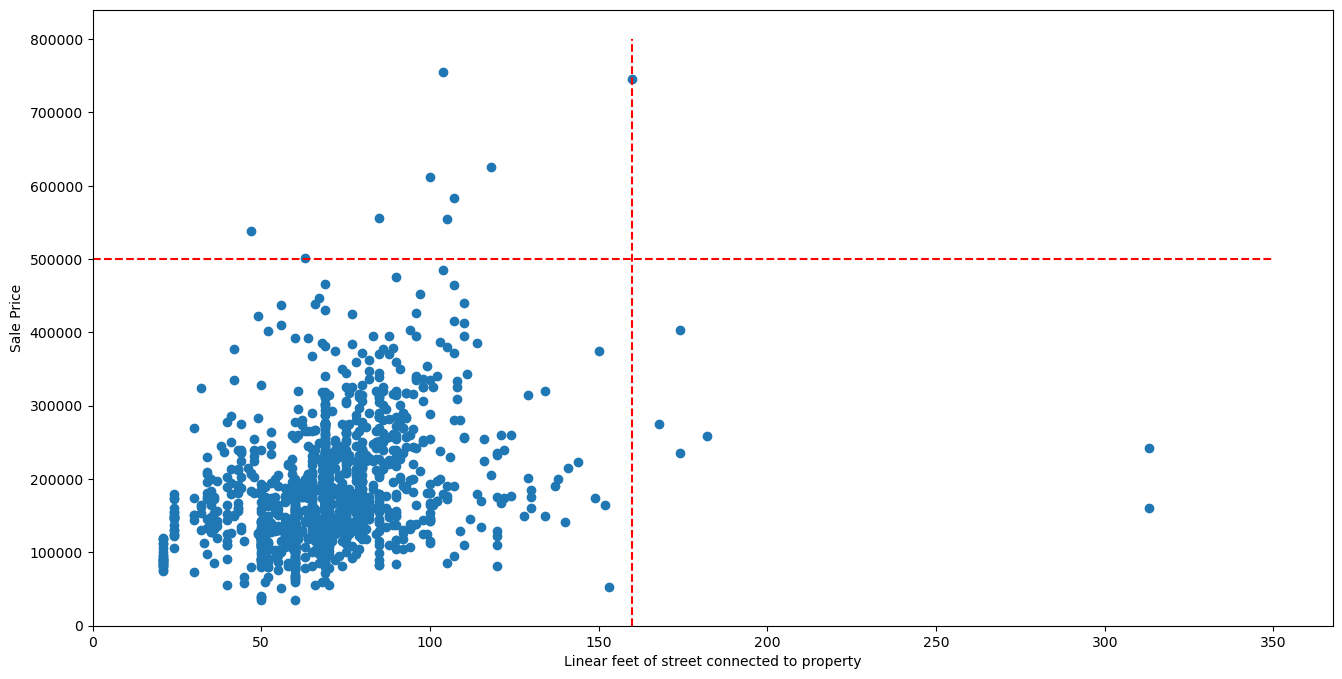

In [41]:
fig, ax = plt.subplots(figsize=(16, 8))
xmin = 0
ymin=0
ax.scatter(train_df['LotFrontage'], train_df["SalePrice"])
ax.set_xlabel("Linear feet of street connected to property")
ax.set_ylabel("Sale Price")
ax.hlines(y=500000, xmin=xmin, xmax=350, color="red", linestyle="dashed")
ax.vlines(x=160, ymin=0, ymax=800000, color="red", linestyle="dashed")
plt.xlim(left=xmin)
plt.ylim(bottom=ymin);

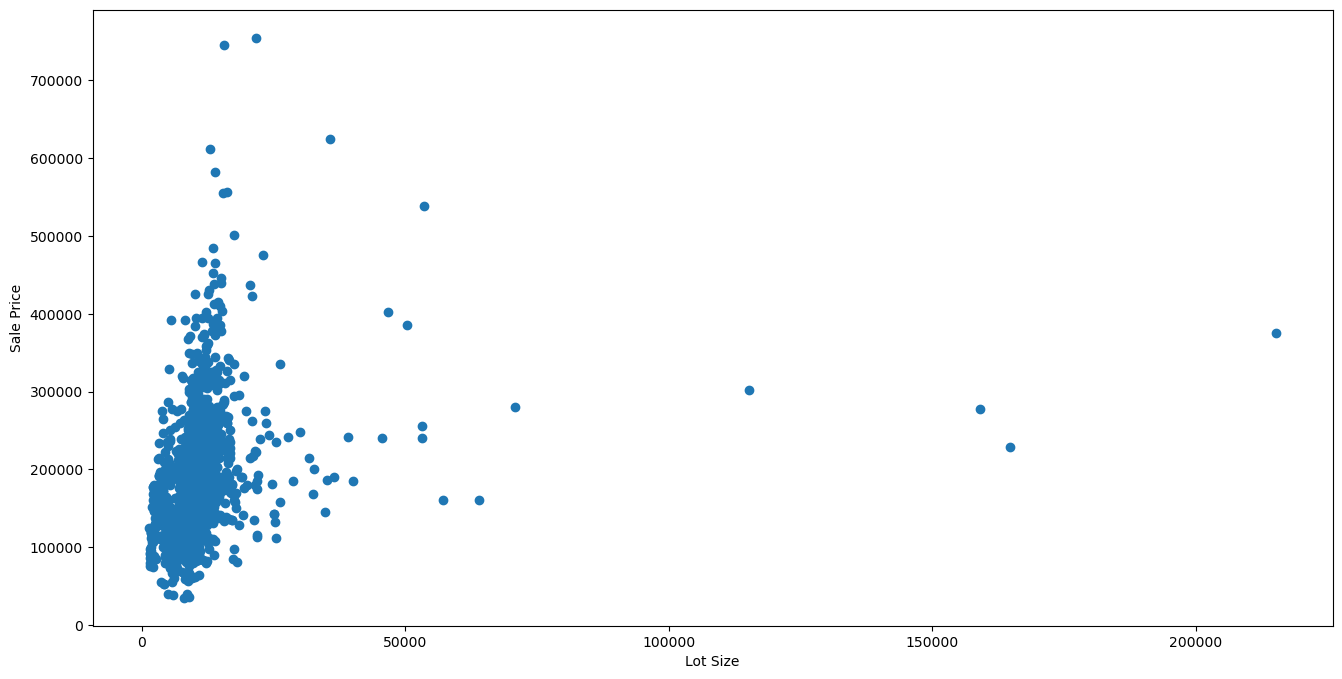

In [42]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(train_df['LotArea'], train_df["SalePrice"])
ax.set_xlabel("Lot Size")
ax.set_ylabel("Sale Price");

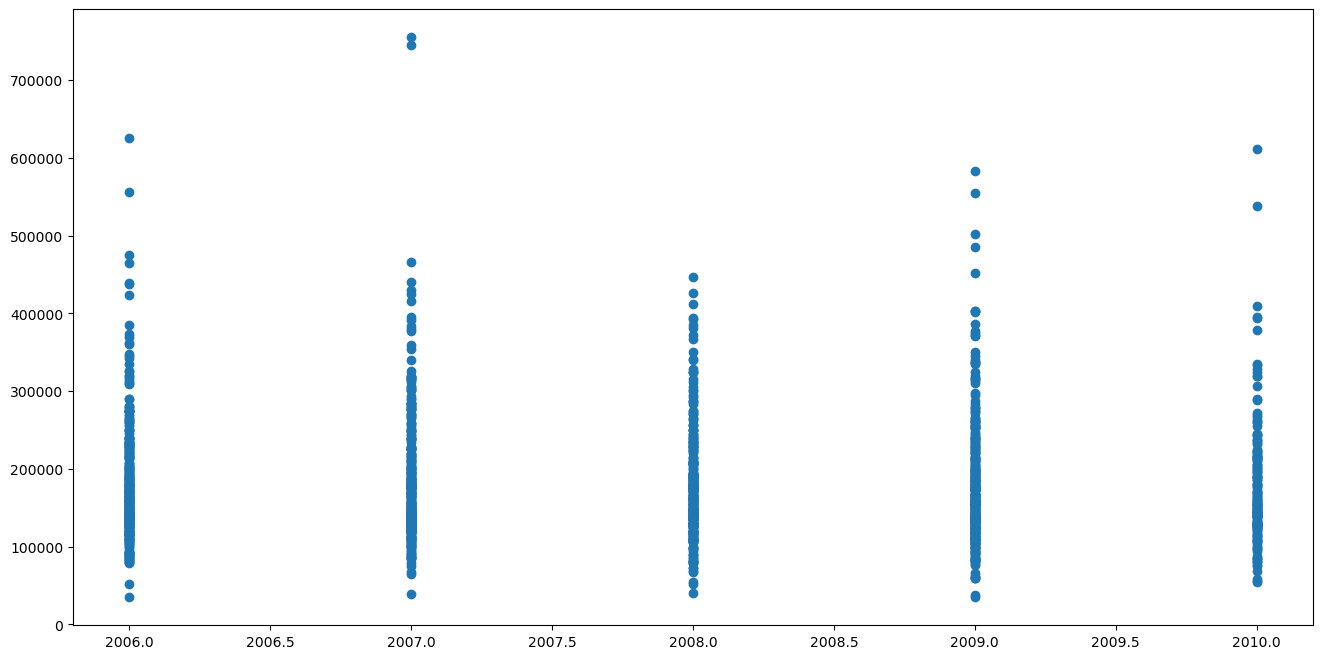

In [43]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(train_df['YrSold'], train_df['SalePrice']);

### Correlation Matrix

let's see our correlation matrix before modelling <br>

And in this section we want to use a `cut-off condition` for correlation matrix because with lot's of columns we are not able to see all of the correlations properly. <br>

**Note:** I tried that on our data and it didn't work out properly so we don't use it for cutting off large amount of columns, just a small proportion of it.<br>

For more information: https://stackoverflow.com/questions/49467553/how-to-select-columns-that-are-highly-correlated-with-one-specific-column-in-a-d

In [44]:
# Let's see the correlation between SalePrice column and other columns in order
train_df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice         1.000000
OverallQual       0.790982
TotalFloorarea    0.716883
GrLivArea         0.708624
ExterQual         0.682639
GarageCars        0.640409
GarageArea        0.623431
BsmtQual          0.617356
TotalBsmtSF       0.613581
TotalBath         0.613005
1stFlrSF          0.605852
QualCond          0.594786
ExQualCond        0.589888
BsmtQualCond      0.588389
YrBltAndRemod     0.576144
AbvTotalBath      0.568267
FullBath          0.560664
TotRmsAbvGrd      0.533723
YearBuilt         0.522897
YearRemodAdd      0.507101
MasVnrArea        0.472614
HasFireplace      0.471908
Fireplaces        0.466929
GarageYrBlt       0.466754
TotalPorchSf      0.390993
BsmtFinSF1        0.386420
Foundation        0.382479
FireplaceQu       0.378377
Finishedbsmt      0.366328
LotFrontage       0.334771
WoodDeckSF        0.324413
2ndFlrSF          0.319334
OpenPorchSF       0.315856
HalfBath          0.284108
GarageCond        0.275781
LotArea           0.263843
GarageQual        0.261347
C

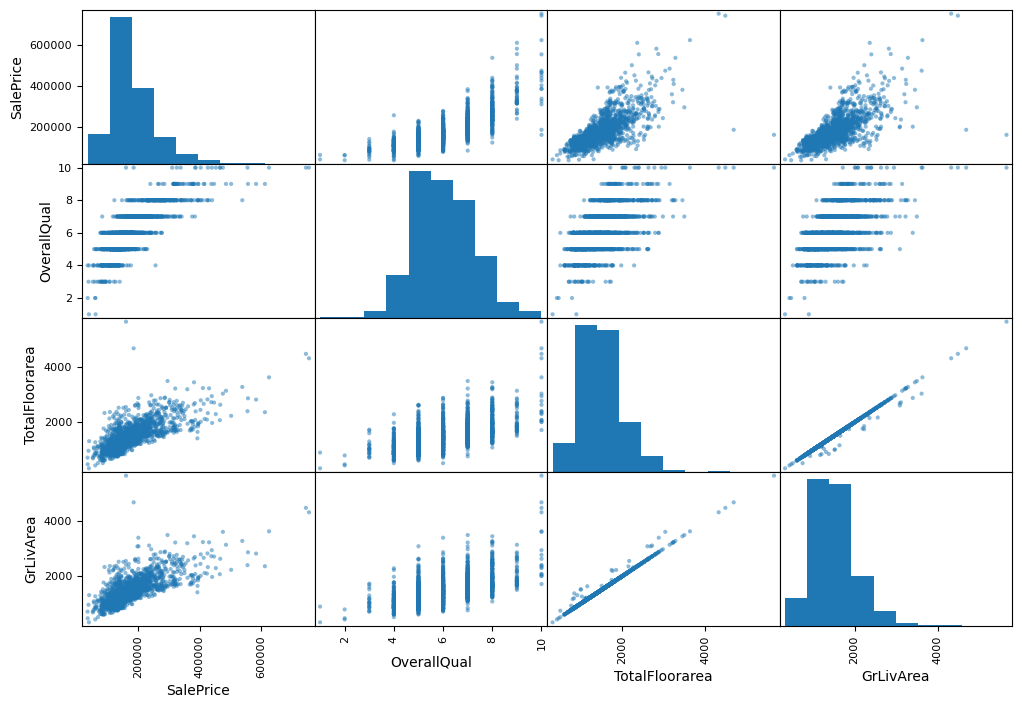

In [45]:
from pandas.plotting import scatter_matrix
attributes = ['SalePrice', 'OverallQual', 'TotalFloorarea', 'GrLivArea']
scatter_matrix(train_df[attributes], figsize=(12, 8));

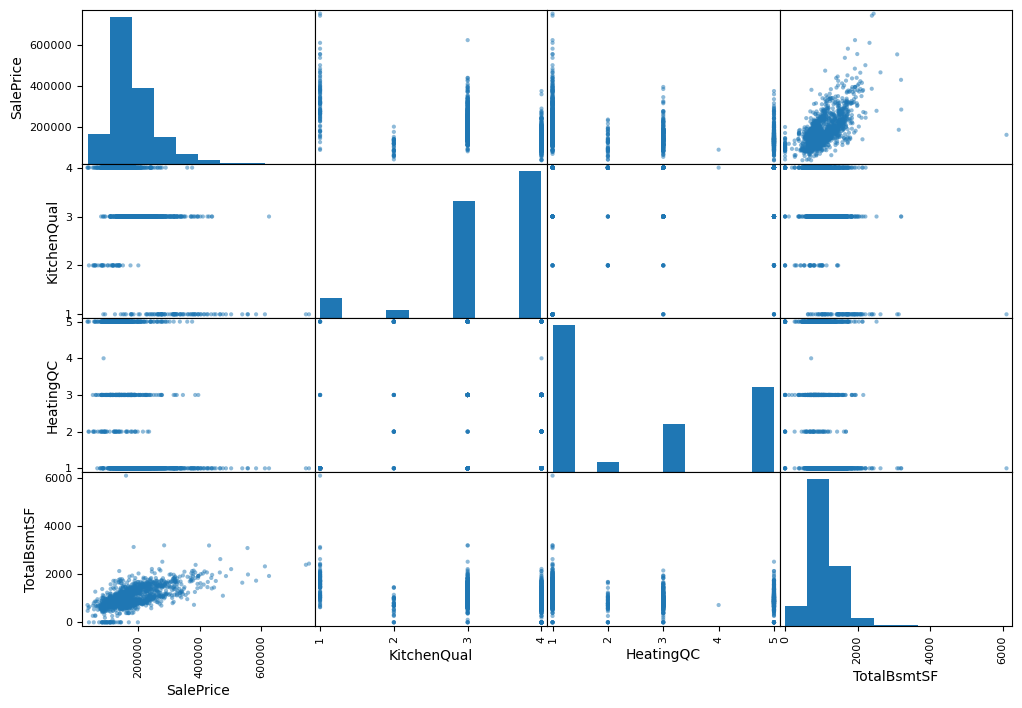

In [46]:
attributes_2 = ['SalePrice', 'KitchenQual', 'HeatingQC', 'TotalBsmtSF']
scatter_matrix(train_df[attributes_2], figsize=(12, 8));

In [47]:
train_df.shape

(1460, 91)

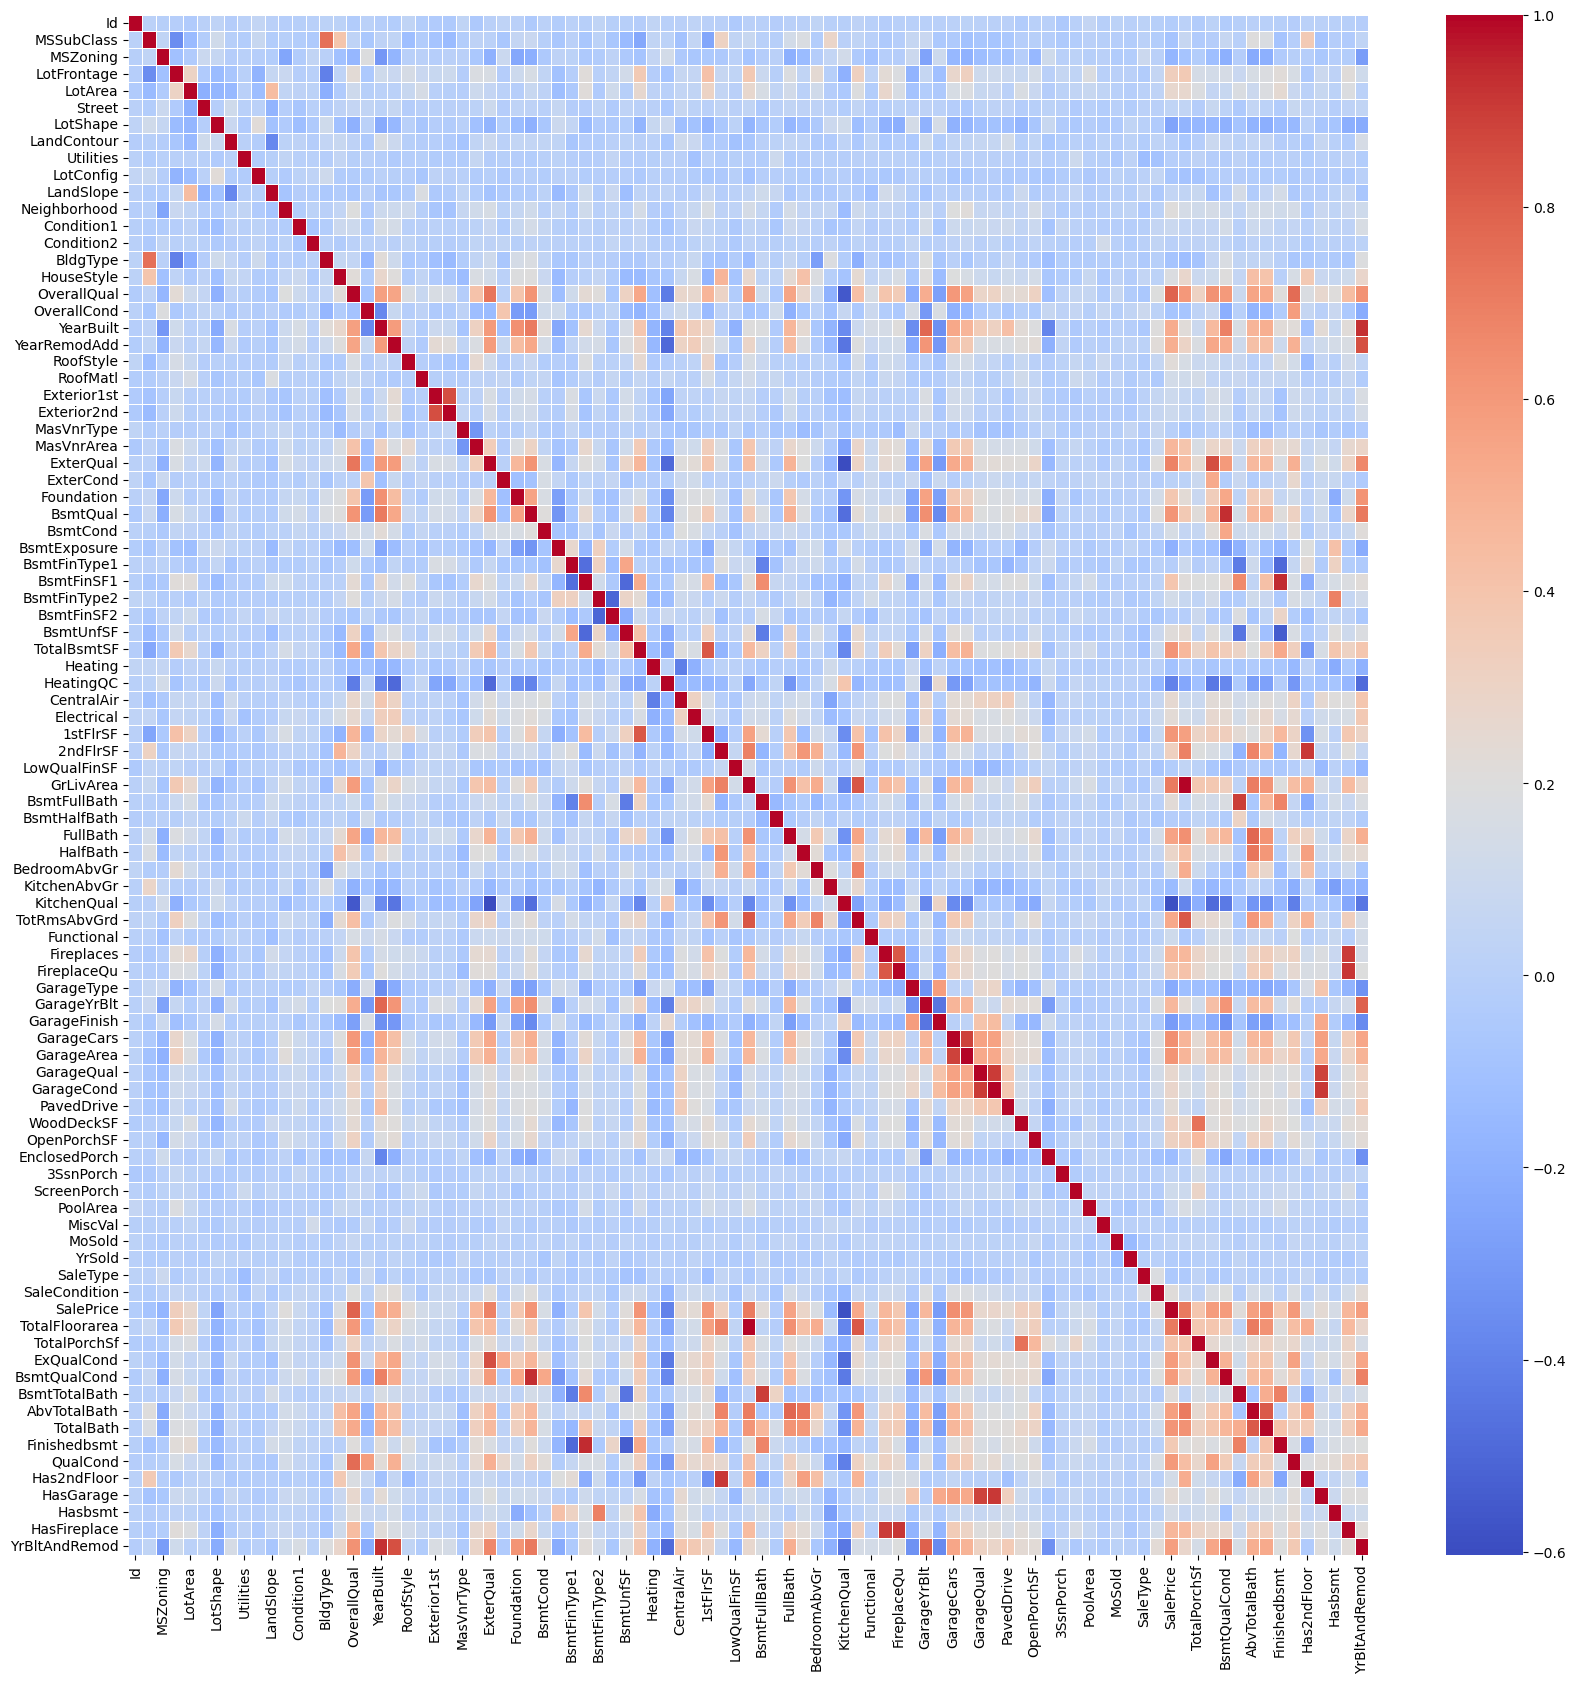

In [48]:
corr_matrix = train_df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr_matrix,
                 linewidths=0.5, # for putting some space between two squares
                 cmap='coolwarm')

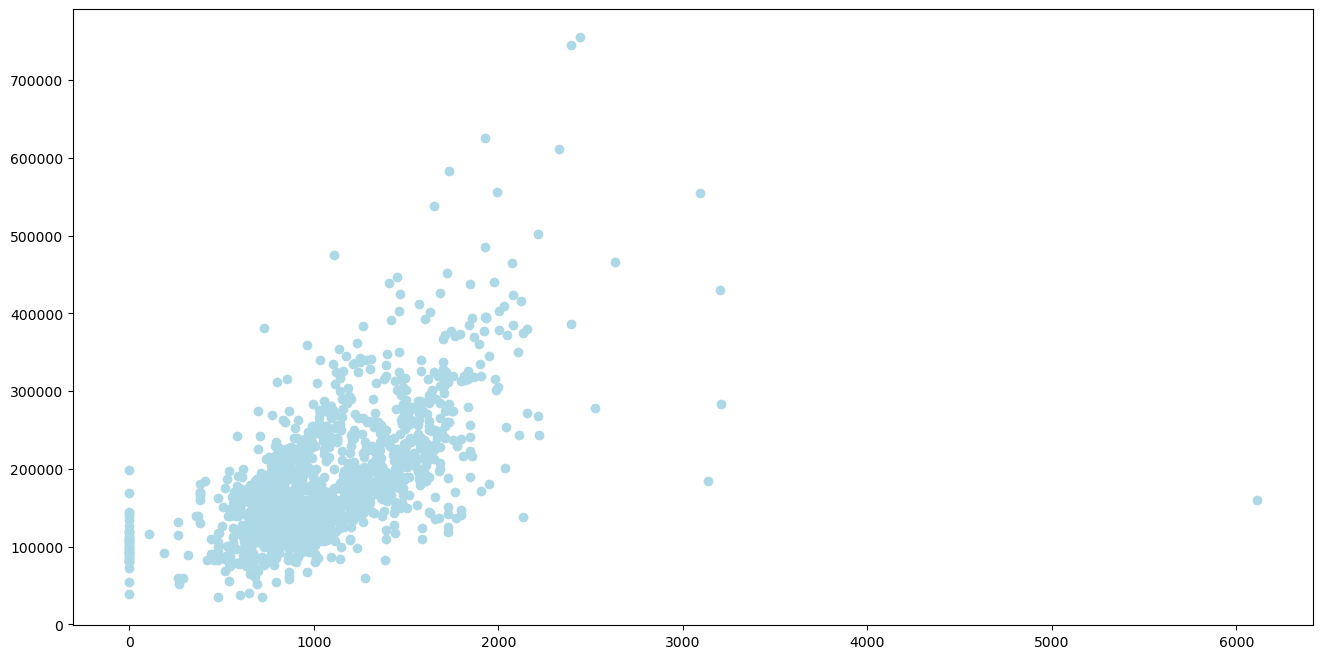

In [49]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(train_df["TotalBsmtSF"], train_df["SalePrice"], color='lightblue');

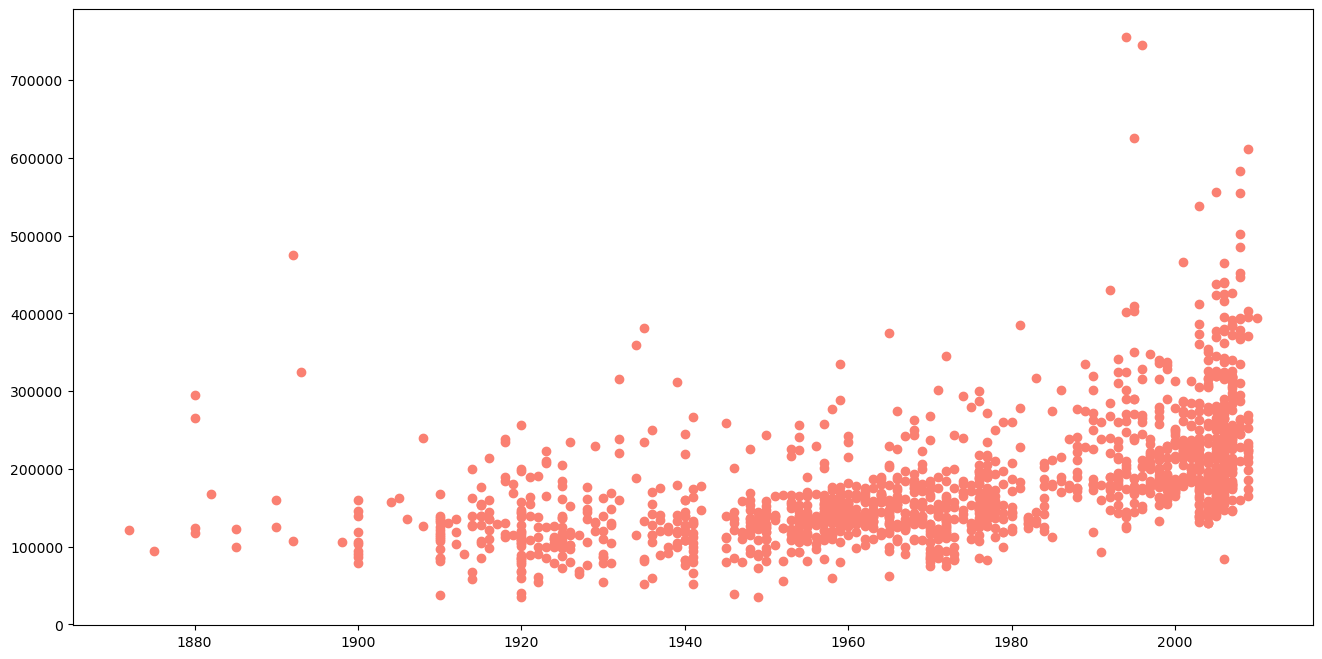

In [50]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(train_df["YearBuilt"], train_df["SalePrice"], color='salmon');

I tried to remove the outliers but our models got overfitted so I decided to remove that part from my notebook

## Split data into X & y

In [51]:
# Setup a random seed
np.random.seed(42)

# Split data into X & y
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

# Split data using train_test_split for fitting
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=42,
                                                    shuffle=True)

## Fit Function
Fit the data into our models and then evaluate the score metric

In [52]:
np.random.seed(42)
models = {'RFR': RandomForestRegressor(),
          'XGBoost': XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                  max_depth=3, min_child_weight=0,
                                  gamma=0, subsample=0.7,
                                  colsample_bytree=0.7,
                                  objective='reg:linear', nthread=-1,
                                  scale_pos_weight=1, seed=27,
                                  reg_alpha=0.00006),
          'CatBoost': CatBoostRegressor(verbose=False),
          'GradientRegressor': GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                                         max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                                         min_samples_split=10, loss='huber', random_state =42)}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # a dictionary for storing scores values 
    scores = {}
    competition = {}
    
    
    # setup a random seed
    np.random.seed(42)
    
    # let's fit and score the data
    for labels, model in models.items():
        # fit the data to the model
        model.fit(X_train, y_train)
        # Score predictions of our model in a variable
        y_preds = model.predict(X_test)
        # Evaluate our model and append the result to the dictionary
        scores[labels] = model.score(X_test, y_test)
        # Evaluate competition metric on our models
        competition[labels] = round(mean_squared_error(np.log(y_test), np.log(y_preds), squared=False), 4)
    
    return scores, competition

## Building an evaluation function
According to kaggle House Prices - Advanced Regression Techniques competition, the evaluation function is `Root-Mean-Squared-Error (RMSE)` between the **logarithm of the predicted value and the logarithm of the observed sales price.** <br>

### What we are going to evaluate on this function?

* **R2Score** : The R2 score (pronounced R-Squared Score) is a statistical measure that tells us how well our model is making all its predictions on a scale of zero to one.
* **Mean Absolute Error (MAE)** : sum of all the distances/residual s(the difference between the actual and predicted value) divided by the total number of points in the dataset.
* **Root Mean Squared Error (RMSE)** : square root of the average squared distance (difference between actual and predicted value)
* **Root Mean Squared Log Error(RMSLE)** : generally you don't care as much if you're off by 10 dollar as much as you'd care if you were off by 10%, you care more about ratios rather than differences. MAE (mean absolute error) is more about exact differences.

Also for more information about the first three metrics, you can check this link: https://www.freecodecamp.org/news/evaluation-metrics-for-regression-problems-machine-learning/

In [53]:
def Evaluation(model, X_test, y_test):
    """
    In this function, we are going to evaluate the regression metrics for our models
    """
    # setup a random seed
    np.random.seed(42)
    
    # let's store predicted values
    y_preds = model.predict(X_test)
    
    # Let's begin the evaluation
    print(f"Root Mean Squared Error (Competition Evaluation Metrics): {round(mean_squared_error(np.log(y_test), np.log(y_preds), squared=False), 4)}")
    print(f"R2 Score: {round(r2_score(y_test, y_preds), 2)}")
    print(f"Mean Absolute Error: {round(mean_absolute_error(y_test, y_preds), 2)}")
    print(f"Mean Squared Log Error: {round(mean_squared_log_error(y_test, y_preds), 2)}")


In [54]:
fit_and_score(models,
              X_train, 
              X_test,
              y_train,
              y_test)

[17:58:49] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


({'RFR': 0.9020385359442303,
  'XGBoost': 0.9244055699649215,
  'CatBoost': 0.9202998537922801,
  'GradientRegressor': 0.9149067987644823},
 {'RFR': 0.1373,
  'XGBoost': 0.1279,
  'CatBoost': 0.124,
  'GradientRegressor': 0.1281})

We are going to use catboost model since it has better score than the others

In [55]:
cat_last_model = CatBoostRegressor(verbose=False)
cat_last_model.fit(X_train, y_train)

In [56]:
Evaluation(cat_last_model,
           X_train, 
           y_train)

Root Mean Squared Error (Competition Evaluation Metrics): 0.0312
R2 Score: 1.0
Mean Absolute Error: 3477.76
Mean Squared Log Error: 0.0


As you can see above, when we remove outliers our model performance (Root Mean Squared Error (Competition Evaluation Metrics)) improves.

## Load Test Dataset

In [57]:
test_df = pd.read_csv('test.csv')
test_df.head().T

,0,1,2,3,4
Id,1461,1462,1463,1464,1465
MSSubClass,20,20,60,60,120
MSZoning,RH,RL,RL,RL,RL
LotFrontage,80.0,81.0,74.0,78.0,43.0
LotArea,11622,14267,13830,9978,5005
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,IR1,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,HLS
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [58]:
test_df['LotFrontage'].max()

200.0

In [59]:
len(test_df)

1459

## Adding columns

In [60]:
test_df['TotalFloorarea'] = test_df['1stFlrSF'] + test_df['2ndFlrSF']

test_df['TotalPorchSf'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

test_df['ExterQual'] = test_df['ExterQual'].replace(['Fa', 'TA', 'Gd', 'Ex'], [1, 2, 3, 4])
test_df['ExterCond'] = test_df['ExterCond'].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'], [1, 2, 3, 4, 5])
test_df['ExQualCond'] = (test_df['ExterQual'] + test_df['ExterCond']) / 2

test_df['BsmtQual'] = test_df['BsmtQual'].replace(['Fa', 'TA', 'Gd', 'Ex'], [1, 2, 3, 4])
test_df['BsmtCond'] = test_df['BsmtCond'].replace(['Po', 'Fa', 'TA', 'Gd'], [1, 2, 3, 4])
test_df['BsmtQualCond'] = (test_df['BsmtQual'] + test_df['BsmtCond']) / 2

# Total number of bath in basement
test_df['BsmtTotalBath'] = test_df['BsmtFullBath'] + test_df['BsmtHalfBath']
# Total number of bath above the basement
test_df['AbvTotalBath'] = test_df['FullBath'] + test_df['HalfBath']
# Total number of baths in a house
test_df['TotalBath'] = test_df['BsmtTotalBath'] + test_df['AbvTotalBath']

test_df['Finishedbsmt'] = test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

test_df['QualCond'] = (test_df['OverallQual'] + test_df['OverallCond']) / 2

# if the house has a second floor x turns into 1
test_df['Has2ndFloor'] = test_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# if the house has a garage x turns into 1
test_df['HasGarage'] = test_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0) 
# if the house has a basement x turns into 1
test_df['Hasbsmt'] = test_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# if the house has a Fireplace x turns into 1
test_df['HasFireplace'] = test_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0) 

test_df['YrBltAndRemod'] = test_df['YearBuilt'] + test_df['YearRemodAdd']

In [61]:
test_df.isna().sum()

Id                   0
MSSubClass           0
MSZoning             4
LotFrontage        227
LotArea              0
Street               0
Alley             1352
LotShape             0
LandContour          0
Utilities            2
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Condition2           0
BldgType             0
HouseStyle           0
OverallQual          0
OverallCond          0
YearBuilt            0
YearRemodAdd         0
RoofStyle            0
RoofMatl             0
Exterior1st          1
Exterior2nd          1
MasVnrType          16
MasVnrArea          15
ExterQual            0
ExterCond            0
Foundation           0
BsmtQual            44
BsmtCond            45
BsmtExposure        44
BsmtFinType1        42
BsmtFinSF1           1
BsmtFinType2        42
BsmtFinSF2           1
BsmtUnfSF            1
TotalBsmtSF          1
Heating              0
HeatingQC            0
CentralAir           0
Electrical           0
1stFlrSF   

In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 94 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1459 non-null   int64  
 1   MSSubClass      1459 non-null   int64  
 2   MSZoning        1455 non-null   object 
 3   LotFrontage     1232 non-null   float64
 4   LotArea         1459 non-null   int64  
 5   Street          1459 non-null   object 
 6   Alley           107 non-null    object 
 7   LotShape        1459 non-null   object 
 8   LandContour     1459 non-null   object 
 9   Utilities       1457 non-null   object 
 10  LotConfig       1459 non-null   object 
 11  LandSlope       1459 non-null   object 
 12  Neighborhood    1459 non-null   object 
 13  Condition1      1459 non-null   object 
 14  Condition2      1459 non-null   object 
 15  BldgType        1459 non-null   object 
 16  HouseStyle      1459 non-null   object 
 17  OverallQual     1459 non-null   i

### Fill missing numerical values

In [63]:
find_fill_missing_numeric_under_1100(test_df)

Id                   0
MSSubClass           0
MSZoning             4
LotFrontage          0
LotArea              0
Street               0
Alley             1352
LotShape             0
LandContour          0
Utilities            2
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Condition2           0
BldgType             0
HouseStyle           0
OverallQual          0
OverallCond          0
YearBuilt            0
YearRemodAdd         0
RoofStyle            0
RoofMatl             0
Exterior1st          1
Exterior2nd          1
MasVnrType          16
MasVnrArea           0
ExterQual            0
ExterCond            0
Foundation           0
BsmtQual             0
BsmtCond             0
BsmtExposure        44
BsmtFinType1        42
BsmtFinSF1           0
BsmtFinType2        42
BsmtFinSF2           0
BsmtUnfSF            0
TotalBsmtSF          0
Heating              0
HeatingQC            0
CentralAir           0
Electrical           0
1stFlrSF   

## Fill missing values under 1100 samples

In [64]:
find_missing_over_1100(test_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 90 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1459 non-null   int64  
 1   MSSubClass      1459 non-null   int64  
 2   MSZoning        1455 non-null   object 
 3   LotFrontage     1459 non-null   float64
 4   LotArea         1459 non-null   int64  
 5   Street          1459 non-null   object 
 6   LotShape        1459 non-null   object 
 7   LandContour     1459 non-null   object 
 8   Utilities       1457 non-null   object 
 9   LotConfig       1459 non-null   object 
 10  LandSlope       1459 non-null   object 
 11  Neighborhood    1459 non-null   object 
 12  Condition1      1459 non-null   object 
 13  Condition2      1459 non-null   object 
 14  BldgType        1459 non-null   object 
 15  HouseStyle      1459 non-null   object 
 16  OverallQual     1459 non-null   int64  
 17  OverallCond     1459 non-null   i

(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], None)

## Convert string into category

In [65]:
string_to_category(test_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 90 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Id              1459 non-null   int64   
 1   MSSubClass      1459 non-null   int64   
 2   MSZoning        1455 non-null   category
 3   LotFrontage     1459 non-null   float64 
 4   LotArea         1459 non-null   int64   
 5   Street          1459 non-null   category
 6   LotShape        1459 non-null   category
 7   LandContour     1459 non-null   category
 8   Utilities       1457 non-null   category
 9   LotConfig       1459 non-null   category
 10  LandSlope       1459 non-null   category
 11  Neighborhood    1459 non-null   category
 12  Condition1      1459 non-null   category
 13  Condition2      1459 non-null   category
 14  BldgType        1459 non-null   category
 15  HouseStyle      1459 non-null   category
 16  OverallQual     1459 non-null   int64   
 17  OverallCond   

In [66]:
category_to_numeric(test_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalFloorarea,TotalPorchSf,ExQualCond,BsmtQualCond,BsmtTotalBath,AbvTotalBath,TotalBath,Finishedbsmt,QualCond,Has2ndFloor,HasGarage,Hasbsmt,HasFireplace,YrBltAndRemod
0,1461,20,3,80.0,11622,2,4,4,1,5,1,13,2,3,1,3,5,6,1961,1961,2,1,11,13,3,0.0,2,3,2,2.0,3.0,4,5,468.0,4,144.0,270.0,882.0,1,5,2,4,896,0,0,896,0.0,0.0,1,0,2,1,4,5,7,0,0,2,1961.0,3,1.0,730.0,4,5,3,140,0,0,0,120,0,0,6,2010,9,5,896,260,2.5,2.5,0.0,1,1.0,612.0,5.5,0,1,1,0,3922
1,1462,20,4,81.0,14267,2,1,4,1,1,1,13,3,3,1,3,6,6,1958,1958,4,1,12,14,2,108.0,2,3,2,2.0,3.0,4,1,923.0,6,0.0,406.0,1329.0,1,5,2,4,1329,0,0,1329,0.0,0.0,1,1,3,1,3,6,7,0,0,2,1958.0,3,1.0,312.0,4,5,3,393,36,0,0,0,0,12500,6,2010,9,5,1329,429,2.5,2.5,0.0,2,2.0,923.0,6.0,0,1,1,0,3916
2,1463,60,4,74.0,13830,2,1,4,1,5,1,9,3,3,1,5,5,5,1997,1998,2,1,11,13,3,0.0,2,3,3,3.0,3.0,4,3,791.0,6,0.0,137.0,928.0,1,3,2,4,928,701,0,1629,0.0,0.0,2,1,3,1,4,6,7,1,5,2,1997.0,1,2.0,482.0,4,5,3,212,34,0,0,0,0,0,3,2010,9,5,1629,246,2.5,3.0,0.0,3,3.0,791.0,5.0,1,1,1,1,3995
3,1464,60,4,78.0,9978,2,1,4,1,5,1,9,3,3,1,5,6,6,1998,1998,2,1,11,13,2,20.0,2,3,3,2.0,3.0,4,3,602.0,6,0.0,324.0,926.0,1,1,2,4,926,678,0,1604,0.0,0.0,2,1,3,1,3,7,7,1,3,2,1998.0,1,2.0,470.0,4,5,3,360,36,0,0,0,0,0,6,2010,9,5,1604,396,2.5,2.5,0.0,3,3.0,602.0,6.0,1,1,1,1,3996
4,1465,120,4,43.0,5005,2,1,2,1,5,1,23,3,3,5,3,8,5,1992,1992,2,1,7,7,3,0.0,3,3,3,3.0,3.0,4,1,263.0,6,0.0,1017.0,1280.0,1,1,2,4,1280,0,0,1280,0.0,0.0,2,0,2,1,3,5,7,0,0,2,1992.0,2,2.0,506.0,4,5,3,0,82,0,0,144,0,0,1,2010,9,5,1280,226,3.0,3.0,0.0,2,2.0,263.0,6.5,0,1,1,0,3984


In [67]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 90 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1459 non-null   int64  
 1   MSSubClass      1459 non-null   int64  
 2   MSZoning        1459 non-null   int8   
 3   LotFrontage     1459 non-null   float64
 4   LotArea         1459 non-null   int64  
 5   Street          1459 non-null   int8   
 6   LotShape        1459 non-null   int8   
 7   LandContour     1459 non-null   int8   
 8   Utilities       1459 non-null   int8   
 9   LotConfig       1459 non-null   int8   
 10  LandSlope       1459 non-null   int8   
 11  Neighborhood    1459 non-null   int8   
 12  Condition1      1459 non-null   int8   
 13  Condition2      1459 non-null   int8   
 14  BldgType        1459 non-null   int8   
 15  HouseStyle      1459 non-null   int8   
 16  OverallQual     1459 non-null   int64  
 17  OverallCond     1459 non-null   i

In [68]:
test_df.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


# Predict SalePrice 
We are going to use catboost model to predict SalePrice column

In [69]:
test_df['SalePrice'] = cat_last_model.predict(test_df)
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalFloorarea,TotalPorchSf,ExQualCond,BsmtQualCond,BsmtTotalBath,AbvTotalBath,TotalBath,Finishedbsmt,QualCond,Has2ndFloor,HasGarage,Hasbsmt,HasFireplace,YrBltAndRemod,SalePrice
0,1461,20,3,80.0,11622,2,4,4,1,5,1,13,2,3,1,3,5,6,1961,1961,2,1,11,13,3,0.0,2,3,2,2.0,3.0,4,5,468.0,4,144.0,270.0,882.0,1,5,2,4,896,0,0,896,0.0,0.0,1,0,2,1,4,5,7,0,0,2,1961.0,3,1.0,730.0,4,5,3,140,0,0,0,120,0,0,6,2010,9,5,896,260,2.5,2.5,0.0,1,1.0,612.0,5.5,0,1,1,0,3922,123635.909917
1,1462,20,4,81.0,14267,2,1,4,1,1,1,13,3,3,1,3,6,6,1958,1958,4,1,12,14,2,108.0,2,3,2,2.0,3.0,4,1,923.0,6,0.0,406.0,1329.0,1,5,2,4,1329,0,0,1329,0.0,0.0,1,1,3,1,3,6,7,0,0,2,1958.0,3,1.0,312.0,4,5,3,393,36,0,0,0,0,12500,6,2010,9,5,1329,429,2.5,2.5,0.0,2,2.0,923.0,6.0,0,1,1,0,3916,157547.705411
2,1463,60,4,74.0,13830,2,1,4,1,5,1,9,3,3,1,5,5,5,1997,1998,2,1,11,13,3,0.0,2,3,3,3.0,3.0,4,3,791.0,6,0.0,137.0,928.0,1,3,2,4,928,701,0,1629,0.0,0.0,2,1,3,1,4,6,7,1,5,2,1997.0,1,2.0,482.0,4,5,3,212,34,0,0,0,0,0,3,2010,9,5,1629,246,2.5,3.0,0.0,3,3.0,791.0,5.0,1,1,1,1,3995,184239.003347
3,1464,60,4,78.0,9978,2,1,4,1,5,1,9,3,3,1,5,6,6,1998,1998,2,1,11,13,2,20.0,2,3,3,2.0,3.0,4,3,602.0,6,0.0,324.0,926.0,1,1,2,4,926,678,0,1604,0.0,0.0,2,1,3,1,3,7,7,1,3,2,1998.0,1,2.0,470.0,4,5,3,360,36,0,0,0,0,0,6,2010,9,5,1604,396,2.5,2.5,0.0,3,3.0,602.0,6.0,1,1,1,1,3996,191568.561160
4,1465,120,4,43.0,5005,2,1,2,1,5,1,23,3,3,5,3,8,5,1992,1992,2,1,7,7,3,0.0,3,3,3,3.0,3.0,4,1,263.0,6,0.0,1017.0,1280.0,1,1,2,4,1280,0,0,1280,0.0,0.0,2,0,2,1,3,5,7,0,0,2,1992.0,2,2.0,506.0,4,5,3,0,82,0,0,144,0,0,1,2010,9,5,1280,226,3.0,3.0,0.0,2,2.0,263.0,6.5,0,1,1,0,3984,189218.761102


In [70]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',


## Submission form

In [71]:
cat_last_submission = test_df.drop(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 
                                 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                                 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
                                 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 
                                 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 
                                 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 
                                 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                                 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 
                                 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 
                                 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                                 'ScreenPorch', 'PoolArea', 'MiscVal',
                                 'MoSold', 'YrSold', 'SaleType', 'SaleCondition','TotalFloorarea', 'ExQualCond', 'BsmtQualCond', 
                                 'BsmtTotalBath', 'AbvTotalBath', 'TotalBath', 'Finishedbsmt', 'QualCond', 'TotalPorchSf', 'Has2ndFloor', 'HasGarage', 'Hasbsmt', 'HasFireplace', 'YrBltAndRemod'], axis=1)
cat_last_submission.head()

,Id,SalePrice
0,1461,123635.909917
1,1462,157547.705411
2,1463,184239.003347
3,1464,191568.561160
4,1465,189218.761102


In [72]:
cat_last_submission.set_index('Id', inplace=True)
cat_last_submission.head()

,SalePrice
Id,
1461,123635.909917
1462,157547.705411
1463,184239.003347
1464,191568.561160
1465,189218.761102


In [73]:
cat_last_submission.to_csv('cat_last_submission.csv')